In [33]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# On the non-existence of Rossby waves and
# the spin-up problem

Laurits Andreasen & Niklas Heim

The zonal Ekman transport $U_E$ can be written based on the wind stress:
 
$$ \frac{\partial w_E}{\partial z} = - \nabla u_E $$
 
Integrate over depth:
 
$$w_E(0) = - \nabla U_E = - curl(\frac{\vec{\tau}}{\rho_0 f})$$

Which lets us calculate the interior solution with the stream function $\Psi$.

$$ \Psi_I = - \frac{f}{\beta H} \int_x^{x_e} w_E dx' $$

At the western boundary, Stommel solution based on bottom friction, which in total gives:

$$ \Psi = \Psi_I(x,y) (1 - e^{x/\delta_S}) $$


Zonal transport can be split into a geostrophic and an Ekman part.

$$ \rho f \hat{k} \times \vec{u} = -\nabla p + \frac{\partial \tau}{\partial z} $$

# Stommel steady state

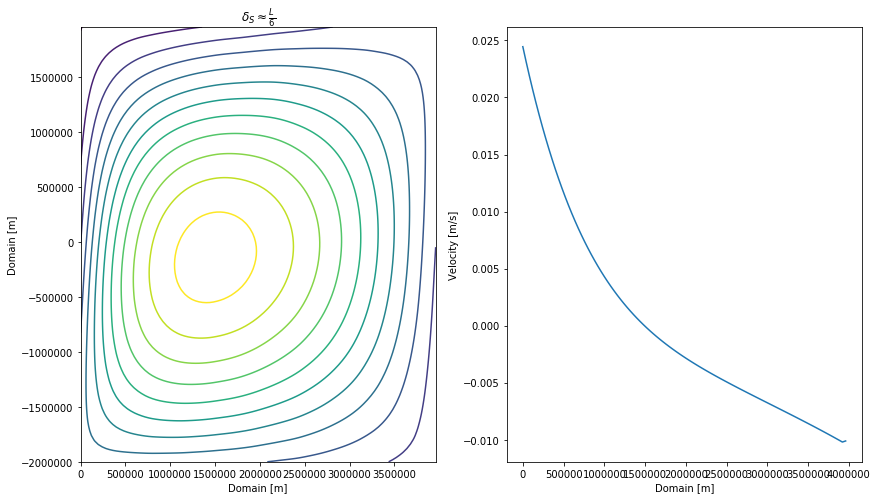

In [52]:
from netCDF4 import Dataset

with Dataset("present.nc", "r") as df:
    i = 20000
    eta = df.variables['eta'][i]
    u   = df.variables['uvel'][i]
    v   = df.variables['vvel'][i]
    x   = df.variables['x'][:]
    y   = df.variables['y'][:]
    
fig, ax = plt.subplots(1,2,figsize=(14,8))
ax[0].contour(x,y,eta,15)
ax[0].set_title(r'$\delta_S \approx \frac{L}{6}$')
ax[0].set_xlabel('Domain [m]')
ax[0].set_ylabel('Domain [m]')

ax[1].plot(x[0],v[eta.shape[0]/2])
ax[1].set_xlabel('Domain [m]')
ax[1].set_ylabel("Velocity [m/s]")
# plt.tight_layout()
plt.show()

# Constants

| Parameter        | Value           | Unit  |
| ---------------- |:-------------:| -----:|
| Gravitation $g$  | 9.81 $\frac{m}{s^2}$ | - |
| Basin depth $H$    | 4000 $m$ | - |
| Friction $\kappa$ | $\frac{1}{2}$ 1/Days |  - |
| Rotation $f_0$ | $10^{-4}$ 1/s | - |
| Rotation $\beta$ | $10^{-11}$ 1/s | - |
| ---------------- |-------------| -----|
| Simulation time | 1009637.5 s | - |
| Friction time| 172800.0 s| $\frac{1}{\kappa}$|
| Rossby travel time | 97297.8 s | $\frac{L}{c_R}$ |
| Rotation time | 10000 s | $\frac{1}{f_0} $ |
| Time step | 20 s |  - |
| ---------------- |-------------| -----|
| Gravity wave speed $c$ | 200 m/s | $ \sqrt{ g H }$|
| Rossby Radius $R$ | 1980908.8 m | $\frac{c}{f}$ |
| WBC width $\delta_S$ | 578703.7 m | $ \frac{\kappa}{\beta}$ |
| Grid size | 40000.0 m | - |
| Domain size | 4000000.0 m | - |

# Time series / Spectra

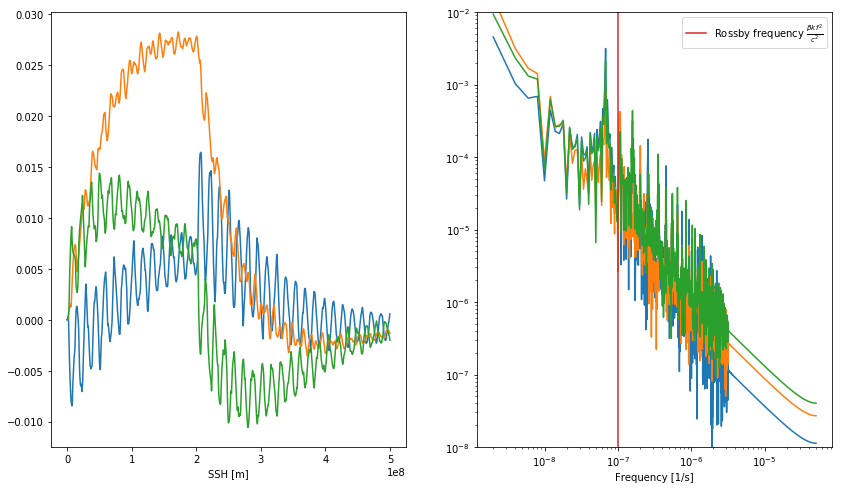

In [79]:
lat = 75
with Dataset('present.nc', "r") as df:
#     eta = df["eta"][:,lat,:]
    dt = df.getncattr("saved_timestep")
    x  = df["x"][:]
    
from fourier import npfft

i = 0
series1 = eta[i:,20]
n, fft1 = npfft(series1)
series2 = eta[i:,50]
n, fft2 = npfft(series2)
series3 = eta[i:,70]
n, fft3 = npfft(series3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
time = np.arange(0, len(series1)*dt, dt)
ax1.plot(time, series1, label='one')
ax1.plot(time, series2)
ax1.plot(time, series3)

ax1.set_xlabel("Time [s]")
ax1.set_xlabel("SSH [m]")

freq = n/time[-1]
ax2.plot(freq, fft1)
ax2.plot(freq, fft2)
ax2.plot(freq, fft3)

ax2.set_xlabel("Frequency [1/s]")
ax2.plot([1e-7,1e-7], [1e-8, 1e-2], label=r'Rossby frequency $\frac{\beta k f^2}{c^2}$')
ax2.set_ylim(1e-8, 1e-2)
ax2.loglog()
ax2.legend()
plt.show()

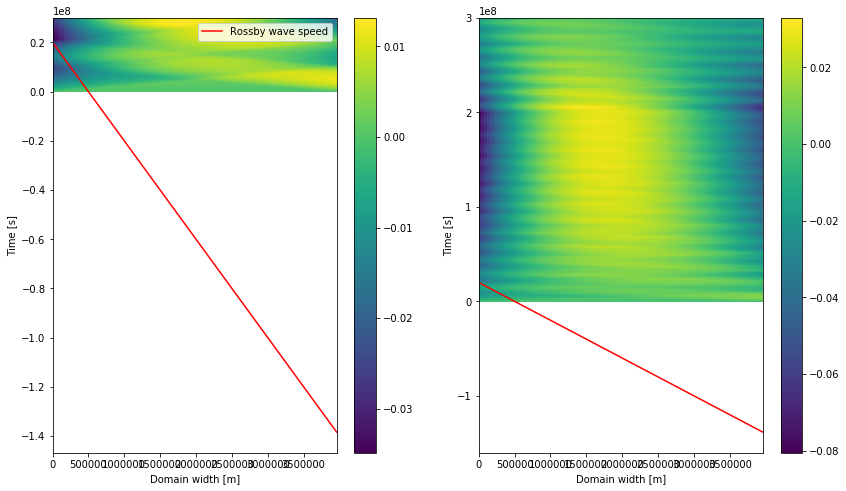

In [83]:
with Dataset("present.nc", "r") as df:
    lat = 25
#     eta = df["eta"][:,lat,:]
    x   = df.variables['x'][:]
    y   = df.variables['y'][:]
    dt  = df.getncattr("saved_timestep")
    
time = np.arange(0, dt*eta.shape[0], dt)
x    = x[0]
vplot = 2e7 - 40. * x
x, time = np.meshgrid(x, time)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))

i = 0
j = 3000
im1 = ax1.pcolormesh(x[i:j], time[i:j], eta[i:j])
ax1.plot(x[0], vplot, 'r', label='Rossby wave speed')
plt.colorbar(im1, ax=ax1)
ax1.set_xlabel('Domain width [m]')
ax1.set_ylabel("Time [s]")
ax1.legend()

i = 0
j = 30000
im2 = ax2.pcolormesh(x[i:j], time[i:j], eta[i:j])
plt.colorbar(im2, ax=ax2)
ax2.set_xlabel('Domain width [m]')
ax2.plot(x[0], vplot, 'r', label='Rossby wave speed')

ax2.set_ylabel("Time [s]")
# plt.tight_layout()
plt.show()